# Plot temperature response over time

This notebook plots temperature respons to SLCFs AND the total scenario forcing in a fixed nr of years

## Imports:

import matplotlib.pyplot as plt
import pandas as pd

In [284]:
import xarray as xr
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [285]:
from ar6_ch6_rcmipfigs.utils.plot import get_cmap_dic
from ar6_ch6_rcmipfigs.utils.plot import get_var_nicename

In [286]:
from ar6_ch6_rcmipfigs.constants import OUTPUT_DATA_DIR, RESULTS_DIR

# PATH_DATASET = OUTPUT_DATA_DIR + '/forcing_data_rcmip_models.nc'
# PATH_DT = OUTPUT_DATA_DIR / '/dT_data_rcmip_models.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP.nc'
PATH_DT = OUTPUT_DATA_DIR / 'dT_data_RCMIP_recommendation.nc'

#### Uncertainty data from Chris

In [287]:
PATH_DT_UNCERTAINTY = OUTPUT_DATA_DIR / 'dT_uncertainty_data_FaIR_chris.nc'

## Set values:

In [288]:
first_y = '1750'
last_y = '2100'
# Years to plot:
years = ['2040', '2100']

**Set reference year for temperature change:**

In [289]:
ref_year = '2020'

In [290]:
FIGURE_DIR = RESULTS_DIR / 'figures_recommendation/'

TABS_DIR = RESULTS_DIR / 'tables_recommendation/'

In [291]:

climatemodel = 'climatemodel'
scenario = 'scenario'
variable = 'variable'
time = 'time'

In [292]:
recommendation = 'recommendation'
name_deltaT = 'Delta T'
sum_v = 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

scenario_tot = 'Scenario total'

### Define variables to look at:

In [293]:
# variables to plot:
variables_erf_comp = [
    'ch4',
    'aerosol-total',
    'o3',
    'HFCs',
    'bc_on_snow']
# total ERFs for anthropogenic and total:
variables_erf_tot = ['total_anthropogenic',
                     'total']
variables_all = variables_erf_comp + variables_erf_tot
# Scenarios to plot:

In [294]:

scenarios_fl_370 = ['ssp370', 'ssp370-lowNTCF-aerchemmip', 'ssp370-lowNTCF-gidden'  # Due to mistake here
                    ]

### Scenarios:

In [295]:
scenarios_fl = ['ssp119',
                'ssp126',
                'ssp245',
                'ssp370',
                'ssp370-lowNTCF-aerchemmip',
                'ssp370-lowNTCF-gidden',
                'ssp585']
scenarios_fl_oneNTCF = ['ssp119',
                        'ssp126',
                        'ssp245',
                        'ssp370',
                        'ssp370-lowNTCF-aerchemmip',
                        # 'ssp370-lowNTCF-gidden',
                        'ssp585']

In [296]:
median = 'median'
perc5 = '5th percentile'
perc95 = '95th percentile'

In [297]:
table_csv_name = TABS_DIR / '3-2_table_all_scen.csv'
print(table_csv_name)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/results/tables_recommendation/3-2_table_all_scen.csv


In [298]:

variables_tot = ['Total']
variables_sum = ['Sum SLCFs']


def setup_table_prop(scenario_n='', yrs=None, _vlist=None, scens=None):
    if _vlist is None:
        _vlist = variables_erf_comp
    if yrs is None:
        yrs = ['2040', '2100']
    if scens is None:
        scens = scenarios_fl
    its = [yrs, _vlist]
    _i = pd.MultiIndex.from_product(its, names=['', ''])
    table = pd.DataFrame(columns=scens, index=_i)  # .transpose()
    table.index.name = scenario_n
    return table

## Open dataset:

### Integrate:
The code below opens the file generated in [2_compute_delta_T.ipynb](2_compute_delta_T.ipynb) by integrating

\begin{align*} 
\Delta T (t) &= \int_0^t ERF(t') IRF(t-t') dt' \\
\end{align*}

where IRF is the impulse response function and ERF is the effective radiative forcing from RCMIP. 

In [299]:
ds_DT = xr.open_dataset(PATH_DT)
ds_uncertainty = xr.open_dataset(PATH_DT_UNCERTAINTY)

In [300]:
print(PATH_DT)

/home/sarambl/PHD/IPCC/public/AR6_CH6_RCMIPFIGSv2/ar6_ch6_rcmipfigs/data_out/dT_data_RCMIP_recommendation.nc


## Add sum as variable:

In [301]:
_str = ''
_vl = [get_var_nicename(var).split('(')[0].strip() for var in variables_erf_comp]
for var in _vl:
    _str += f'{var}, '

# ax.set_title('Temperature change, sum SLCF  (%s)' % _str[:-2])


vn_sum = 'Sum SLCF (%s)' % _str[:-2]
print(vn_sum)

# _st = vn_sum.replace('(','').replace(')','').replace(' ','_').replace(',','')+'.csv'


_da_sum = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable)
# _da = ds_DT[name_deltaT].sel(variable=variables_erf_comp).sum(variable).sel(year=slice(int(s_y2), int(e_y2))) - ds_DT_sy
_da_sum  # .assin_coord()
# _ds_check = ds_DT.copy()
ds_DT
# xr.concat([_ds_check[name_deltaT],_da_sum], dim=variable)

dd1 = _da_sum.expand_dims(
    {'variable':
         ['Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)']})
# dd1=dd1.to_dataset()

ds_DT = xr.merge([ds_DT, dd1])

Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)


## Compute sum of all SLCF forcers

In [302]:
from ar6_ch6_rcmipfigs.utils.plot import get_scenario_c_dic, get_scenario_ls_dic

In [303]:

s_y = first_y

cdic = get_scenario_c_dic()
lsdic = get_scenario_ls_dic()


def sum_name(_var):
    """
    Returns the name off the sum o
    """
    return f'{_var} sum '




### compute sum: 

sum_name = 'Sum SLCFs'
ds_sub = ds_DT.sel(variable=variables_erf_comp)
ds_sum = ds_sub.sum(variable)
ds_sum = ds_sum.assign_coords(coords={variable: sum_name})
# add sum to variable coordinatem

ds_sum = xr.concat([ds_sum, ds_DT.sel(variable=variables_erf_comp)], dim=variable)

In [304]:
ds_sum = ds_DT  # .assign_coords(coords={variable:sum_name})



rn_dic = {}
for v in variables_all:
    rn_dic[v] = get_var_nicename(v)

rn_dic_scen = {#'Total': scenario_tot,
    'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip',
    'ssp370-lowNTCF-gidden': 'ssp370-lowNTCF\n-gidden',
}

In [305]:
def fix_names(df):
    df = df.rename(rn_dic)
    df = df.rename(rn_dic_scen, axis=1)
    return df

In [306]:
scntab_dic = {}


# tab_tot = setup_table2()
# tab_tot_sd = setup_table2()
def table_of_sts(_ds, _scn_fl, variables, tab_vars, _yrs, ref_yr, sts=recommendation):
    """
    Creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios,

    :param _ds:
    :param _scn_fl:
    :param variables:
    :param tab_vars:
    :param _yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=_yrs, _vlist=tab_vars)
    for scn in _scn_fl:
        for _var, tabvar in zip(variables, tab_vars):
            # dtvar =  name_deltaT # if ERF name, changes it here.
            tabscn = scn  # Table scenario name the same.
            for year in _yrs:
                _da = _ds[name_deltaT].sel(scenario=scn, variable=_var)
                _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
                _da_y = _da.sel(year=slice(year, year))  # year value
                _tab_da = _da_y - _da_refy
                tabel.loc[(year, tabvar), tabscn] = float(_tab_da.sel(percentile=sts).squeeze().values)  # [0]
    return fix_names(tabel)
    #return tabel





def table_of_stats_varsums(_ds, dsvar, tabvar, yrs, ref_yr, sts=recommendation):
    """
    Sums up over dimension 'variable' and creates pandas dataframe of statistics (mean, median, standard deviation) for change
    in temperature Delta T since year (ref year) for each scenario in scenarios. 

    :param tabvar:
    :param dsvar:
    :param _ds:
    :param yrs:
    :param ref_yr:
    :param sts:
    :return:
    """
    tabel = setup_table_prop(yrs=yrs, _vlist=[tabvar])
    da = _ds[name_deltaT].sel(variable=dsvar)

    for scn in scenarios_fl:
        tabscn = scn  # Table scenario name the same.
        for year in yrs:
            _da = da.sel(scenario=scn, percentile=sts)  # , variable = dsvar)
            _da_refy = _da.sel(year=slice(ref_yr, ref_yr)).squeeze()  # ref year value
            _da_y = _da.sel(year=slice(year, year)).squeeze()  # year value
            _tab_da = (_da_y - _da_refy).squeeze()

            # Do statistics over RCMIP models
            tabel.loc[(year, tabvar), tabscn] = float(_tab_da.squeeze().values)  # [0]

    return tabel

### Computes statistics:

In [307]:
ds_uncertainty = ds_uncertainty.to_array('percentile').rename(name_deltaT).to_dataset()
ds_uncertainty

<xarray.Dataset>
Dimensions:      (base_period: 1, percentile: 10, scenario: 10, variable: 7, year: 81)
Coordinates:
  * scenario     (scenario) object 'ssp119' 'ssp126' ... 'ssp534-over' 'ssp585'
  * variable     (variable) object 'HFCs' ... 'o3'
  * year         (year) int64 2020 2021 2022 2023 2024 ... 2097 2098 2099 2100
  * base_period  (base_period) int64 2020
  * percentile   (percentile) <U7 'p05' 'p16' 'p50' ... 'p84-p50' 'p95-p50'
Data variables:
    Delta T      (percentile, scenario, variable, year, base_period) float64 0.0 ... 0.0722

In [308]:
ds_DT.percentile

<xarray.DataArray 'percentile' (percentile: 1)>
array(['recommendation'], dtype=object)
Coordinates:
  * percentile  (percentile) object 'recommendation'

In [309]:
ds_DT.variable.values





array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc', 'bc_on_snow', 'ch4',
       'co2', 'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic',
       'total_natural', 'volcanic'], dtype=object)

In [310]:
from ar6_ch6_rcmipfigs.utils.plot import nice_name_var as nice_name_var_dic

## Make csv table:


In [315]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp + [sum_v, 'total_anthropogenic'],
                              variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                              ref_year)
_tab = tabel_dT_slcfs.transpose()

o3 = 'Ozone (O$_3$)'
ch4 = 'Methane (CH$_4$)'
HFCs = 'HFCs'
_sum = 'CH$_4$+O$_3$+HFCs'
for year in ['2040', '2100']:
    _tab[(year, _sum)] = _tab[(year, o3)] + _tab[(year, ch4)] + _tab[(year, HFCs)]
_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()

In [316]:
_tab

ssp119  \
                                                                      
2040 Aerosols                                              0.305727   
     BC on snow                                           -0.030288   
     CH$_4$+O$_3$+HFCs                                     -0.10603   
     HFCs                                                0.00554347   
     Methane (CH$_4$)                                    -0.0348115   
     Ozone (O$_3$)                                       -0.0767619   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.169409   
     total_anthropogenic                                   0.401901   
2100 Aerosols                                              0.469746   
     BC on snow                                           -0.043832   
     CH$_4$+O$_3$+HFCs                                    -0.311731   
     HFCs                                                -0.0041241   
     Methane (CH$_4$)                                      -0.16537   
     Ozone (O$_3$)                                        -0.142237   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.114183   
     total_anthropogenic                                   0.116473   

                                                             ssp126  \
                                                                      
2040 Aerosols                                              0.256158   
     BC on snow                                          -0.0255414   
     CH$_4$+O$_3$+HFCs                                   -0.0586394   
     HFCs                                                 0.0172801   
     Methane (CH$_4$)                                    -0.0226653   
     Ozone (O$_3$)                                       -0.0532542   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.171978   
     total_anthropogenic                                   0.511234   
2100 Aerosols                                              0.477843   
     BC on snow                                          -0.0416578   
     CH$_4$+O$_3$+HFCs                                    -0.300025   
     HFCs                                               -0.00179275   
     Methane (CH$_4$)                                     -0.157522   
     Ozone (O$_3$)                                        -0.140711   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...     0.13616   
     total_anthropogenic                                   0.545479   

                                                             ssp245  \
                                                                      
2040 Aerosols                                             0.0571758   
     BC on snow                                         -0.00607383   
     CH$_4$+O$_3$+HFCs                                    0.0880522   
     HFCs                                                 0.0286784   
     Methane (CH$_4$)                                     0.0394332   
     Ozone (O$_3$)                                        0.0199406   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.139154   
     total_anthropogenic                                   0.589496   
2100 Aerosols                                              0.326467   
     BC on snow                                          -0.0397088   
     CH$_4$+O$_3$+HFCs                                    0.0120685   
     HFCs                                                  0.057409   
     Methane (CH$_4$)                                   -0.00394258   
     Ozone (O$_3$)                                       -0.0413979   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.298827   
     total_anthropogenic                                    1.75446   

                                                             ssp370  \
                                                                      
2040 Aerosols                                            -0.0493196   
     BC on 

In [317]:
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_2040_2100_tab.csv'
_tab.to_csv(fn)

### Table +/-percentiles

In [318]:
sum_v

'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)'

In [319]:
ds_uncertainty.variable

<xarray.DataArray 'variable' (variable: 7)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-total', 'anthro', 'bc_on_snow', 'ch4', 'o3'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'o3'

In [320]:
# Mean:
tabel_dT_slcfs_5th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl, variables_erf_comp + [sum_v, 'anthro'],
                                                   variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                   ref_year, sts='p05-p50')
_tab = tabel_dT_slcfs_5th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_5th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [321]:
# Mean:
tabel_dT_slcfs_95th = tabel_dT_slcfs + table_of_sts(ds_uncertainty, scenarios_fl,
                                                    variables_erf_comp + [sum_v, 'anthro'],
                                                    variables_erf_comp + [sum_v, 'total_anthropogenic'], years,
                                                    ref_year, sts='p95-p50')
_tab = tabel_dT_slcfs_95th.transpose()

_tab = _tab.transpose()
_tab = _tab.sort_index()  # ()
_tab.rename(nice_name_var_dic)

fn = TABS_DIR / 'dT_95th_perc_2040_2100_tab.csv'
_tab.to_csv(fn)

In [322]:
_tab

ssp119  \
                                                                       
2040 Aerosols                                               0.527954   
     BC on snow                                            -0.010482   
     HFCs                                                  0.0100244   
     Methane (CH$_4$)                                     -0.0240371   
     Ozone (O$_3$)                                         -0.044066   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...     0.372494   
     total_anthropogenic                                    0.710421   
2100 Aerosols                                               0.877208   
     BC on snow                                           -0.0144057   
     HFCs                                               -0.000967047   
     Methane (CH$_4$)                                      -0.118165   
     Ozone (O$_3$)                                        -0.0774697   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...     0.432829   
     total_anthropogenic                                    0.583242   

                                                             ssp126  \
                                                                      
2040 Aerosols                                              0.459449   
     BC on snow                                         -0.00886971   
     HFCs                                                 0.0248423   
     Methane (CH$_4$)                                    -0.0120869   
     Ozone (O$_3$)                                       -0.0306062   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.363696   
     total_anthropogenic                                   0.827929   
2100 Aerosols                                              0.866746   
     BC on snow                                          -0.0136197   
     HFCs                                                0.00271312   
     Methane (CH$_4$)                                      -0.11125   
     Ozone (O$_3$)                                       -0.0771125   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.447991   
     total_anthropogenic                                    1.13446   

                                                             ssp245  \
                                                                      
2040 Aerosols                                              0.107574   
     BC on snow                                         -0.00278671   
     HFCs                                                 0.0390495   
     Methane (CH$_4$)                                     0.0600146   
     Ozone (O$_3$)                                        0.0380188   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.212868   
     total_anthropogenic                                   0.816868   
2100 Aerosols                                              0.649583   
     BC on snow                                          -0.0140332   
     HFCs                                                  0.081813   
     Methane (CH$_4$)                                     0.0403708   
     Ozone (O$_3$)                                       -0.0102481   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.635452   
     total_anthropogenic                                    2.69287   

                                                             ssp370  \
                                                                      
2040 Aerosols                                            0.00587921   
     BC on snow                                           0.0351826   
     HFCs                                                 0.0362496   
     Methane (CH$_4$)                                      0.102481   
     Ozone (O$_3$)                                         0.114962   
     Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on...    0.209712   
     total_anthropogenic                                   0.882026

In [323]:
# Statistics on Delta T anthropogenic
# Mean
tabel_dT_anthrop = table_of_sts(ds_DT, scenarios_fl, ['total_anthropogenic'], [scenario_tot], years, ref_year)

# 5th
tabel_dT_anthrop_5th = -table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     ['anthro'],
                                     [scenario_tot],
                                     years,
                                     ref_year,
                                     sts='p05-p50'
                                     )
# 95th

tabel_dT_anthrop_95th = table_of_sts(ds_uncertainty, scenarios_fl, ['anthro'], [scenario_tot], years, ref_year,
                                     sts='p95-p50')
tabel_dT_anthrop_95th.loc['2040']
tabel_dT_anthrop_5th.loc['2040']

,ssp119,ssp126,ssp245,ssp370,ssp370-lowNTCF\n-aerchemmip,ssp370-lowNTCF\n-gidden,ssp585
,,,,,,,
Scenario total,0.202181,0.201175,0.152905,0.143779,0.187947,0.159422,0.21497


In [324]:
# Mean:
tabel_dT_slcfs = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp, variables_erf_comp, years,
                              ref_year)
# Standard deviation
tabel_dT_slcfs_5th = -table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p05-p50')
tabel_dT_slcfs_95th = table_of_sts(ds_uncertainty,
                                   scenarios_fl,
                                   variables_erf_comp,
                                   variables_erf_comp,
                                   years,
                                   ref_year,
                                   sts='p95-p50')

# Compute sum of SLCFs
_ds = ds_sum.copy()
vall = 'Delta T'

In [325]:
tabel_dT_slcfs

ssp119      ssp126      ssp245      ssp370  \
                                                                        
2040 Methane (CH$_4$)  -0.0348115  -0.0226653   0.0394332   0.0736096   
     Aerosols            0.305727    0.256158   0.0571758  -0.0493196   
     Ozone (O$_3$)     -0.0767619  -0.0532542   0.0199406   0.0720428   
     HFCs              0.00554347   0.0172801   0.0286784   0.0267792   
     BC on snow         -0.030288  -0.0255414 -0.00607383   0.0149975   
2100 Methane (CH$_4$)    -0.16537   -0.157522 -0.00394258    0.273463   
     Aerosols            0.469746    0.477843    0.326467  -0.0159913   
     Ozone (O$_3$)      -0.142237   -0.140711  -0.0413979    0.238084   
     HFCs              -0.0041241 -0.00179275    0.057409   0.0970282   
     BC on snow         -0.043832  -0.0416578  -0.0397088  0.00784892   

                      ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden  \
                                                                            
2040 Methane (CH$_4$)                   0.0736096              -0.0387952   
     Aerosols                            0.106629                0.106629   
     Ozone (O$_3$)                      0.0281785              -0.0405273   
     HFCs                               0.0267792               0.0267745   
     BC on snow                       -0.00683741             -0.00683741   
2100 Methane (CH$_4$)                    0.273463               -0.125221   
     Aerosols                            0.330153                0.330153   
     Ozone (O$_3$)                       0.161022              -0.0950774   
     HFCs                               0.0970282                0.083694   
     BC on snow                        -0.0323559              -0.0323559   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0596293  
     Aerosols            0.123224  
     Ozone (O$_3$)      0.0437352  
     HFCs               0.0425932  
     BC on snow       -0.00285113  
2100 Methane (CH$_4$)    0.144593  
     Aerosols            0.264415  
     Ozone (O$_3$)      0.0537004  
     HFCs                0.223619  
     BC on snow        -0.0342643

In [326]:
ds_DT.variable

<xarray.DataArray 'variable' (variable: 20)>
array(['HFCs', 'Sum SLCF (Methane, Aerosols, Ozone, HFCs, BC on snow)',
       'aerosol-cloud_interactions', 'aerosol-radiation_interactions',
       'aerosol-total', 'aerosol-total-with_bc', 'bc_on_snow', 'ch4', 'co2',
       'contrails', 'h2o_stratospheric', 'land_use', 'n2o', 'o3',
       'other_wmghg', 'solar', 'total', 'total_anthropogenic', 'total_natural',
       'volcanic'], dtype=object)
Coordinates:
  * variable  (variable) object 'HFCs' ... 'volcanic'

In [327]:
tabel_dT_sum_slcf = table_of_sts(ds_DT,
                                 scenarios_fl,
                                 [sum_v],
                                 ['Sum SLCFs'],
                                 years,
                                 ref_year
                                 )
tabel_dT_sum_slcf_5 = - table_of_sts(ds_uncertainty,
                                     scenarios_fl,
                                     [sum_v],
                                     ['Sum SLCFs'],
                                     years,
                                     ref_year,
                                     sts='p05-p50')
tabel_dT_sum_slcf_95 = table_of_sts(ds_uncertainty,
                                    scenarios_fl,
                                    [sum_v],
                                    ['Sum SLCFs'],
                                    years,
                                    ref_year,
                                    sts='p95-p50')

In [328]:

tabel_dT_slcfs = fix_names(tabel_dT_slcfs)#.rename(rn_dic)
#tabel_dT_slcfs = tabel_dT_slcfs.rename(rn_dic_scen,axis=1)
tabel_dT_slcfs#.index

ssp119      ssp126      ssp245      ssp370  \
                                                                        
2040 Methane (CH$_4$)  -0.0348115  -0.0226653   0.0394332   0.0736096   
     Aerosols            0.305727    0.256158   0.0571758  -0.0493196   
     Ozone (O$_3$)     -0.0767619  -0.0532542   0.0199406   0.0720428   
     HFCs              0.00554347   0.0172801   0.0286784   0.0267792   
     BC on snow         -0.030288  -0.0255414 -0.00607383   0.0149975   
2100 Methane (CH$_4$)    -0.16537   -0.157522 -0.00394258    0.273463   
     Aerosols            0.469746    0.477843    0.326467  -0.0159913   
     Ozone (O$_3$)      -0.142237   -0.140711  -0.0413979    0.238084   
     HFCs              -0.0041241 -0.00179275    0.057409   0.0970282   
     BC on snow         -0.043832  -0.0416578  -0.0397088  0.00784892   

                      ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden  \
                                                                            
2040 Methane (CH$_4$)                   0.0736096              -0.0387952   
     Aerosols                            0.106629                0.106629   
     Ozone (O$_3$)                      0.0281785              -0.0405273   
     HFCs                               0.0267792               0.0267745   
     BC on snow                       -0.00683741             -0.00683741   
2100 Methane (CH$_4$)                    0.273463               -0.125221   
     Aerosols                            0.330153                0.330153   
     Ozone (O$_3$)                       0.161022              -0.0950774   
     HFCs                               0.0970282                0.083694   
     BC on snow                        -0.0323559              -0.0323559   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0596293  
     Aerosols            0.123224  
     Ozone (O$_3$)      0.0437352  
     HFCs               0.0425932  
     BC on snow       -0.00285113  
2100 Methane (CH$_4$)    0.144593  
     Aerosols            0.264415  
     Ozone (O$_3$)      0.0537004  
     HFCs                0.223619  
     BC on snow        -0.0342643

In [329]:
rn_dic

{'ch4': 'Methane (CH$_4$)',
 'aerosol-total': 'Aerosols',
 'o3': 'Ozone (O$_3$)',
 'HFCs': 'HFCs',
 'bc_on_snow': 'BC on snow',
 'total_anthropogenic': 'total_anthropogenic',
 'total': 'total'}

## colors

In [330]:
cdic = get_cmap_dic(variables_erf_comp)  # , palette='colorblind'):
ls = [cdic[key] for key in variables_erf_comp]

ls

/home/sarambl/miniconda3/envs/rcmip_ch6/lib/python3.7/site-packages/pandas/core/indexing.py:1761: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


[(0.6784313725490196, 0.3686274509803922, 0.0),
 (0.4, 0.4, 0.37254901960784315),
 (0.8980392156862745, 0.8549019607843137, 0.2784313725490196),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373)]

## Error bars only from model uncertainty
The following uncertainties assume the ECS has a standard deviation of

In [331]:
from matplotlib.ticker import (MultipleLocator)

scenario_tot = 'Scenario total'

def plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs, tabel_dT_anthrop_5th,
                tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95):
    tits = ['Near Term surface temperature change (2040 relative to 2020)',
            'Long Term surface T change 2100 relatie to 2020)']
    tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
    for yr, ax, tit in zip(years, axs, tits):
        # Pick out year and do various renames:
        # Total antropogenic
        tot_yr = tabel_dT_anthrop.loc[yr]
        # Sum SLCFs
        sum_yr = tabel_dT_sum_slcf.loc[yr]
        # uncertainty:
        bot = tabel_dT_anthrop_5th.loc[yr]
        top = tabel_dT_anthrop_95th.loc[yr]
        err = pd.merge(bot, top, how='outer').values
        # Plot bars for anthropopogenic total:
        print(err)
        print(tot_yr)
        ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values,
                color='k',
                xerr=err,
                error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2),
                label='Scenario total', alpha=.2,
                )
        # Plot bars for SLCFs total:
        sum_SLCFs = 'Sum SLCFs'
        s_x = sum_yr.transpose().index
        s_y = sum_yr.transpose()[sum_SLCFs].values

        # Plot stacked plot of components:
        _tab = tabel_dT_slcfs.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})

        a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
        _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
        # ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
        # uncertainty:
        bot = tabel_dT_sum_slcf_5.loc[yr]
        top = tabel_dT_sum_slcf_95.loc[yr]
        err = pd.merge(bot, top, how='outer').values

        ax.errorbar(_t, list(_t.reset_index().index), xerr=err, label=scenario_tot, color='w', fmt='d',
                    linestyle="None")  # ,

        if not yr == '2040':
            ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
        # Zero line:
        ax.axvline(0, linestyle='--', color='k', alpha=0.4)
        ax.set_title(tit)
        ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
        ax.xaxis.set_minor_locator(MultipleLocator(.1))
        # ax.grid(axis='y', which='major')

def fix_axs(axs):
    ax = axs[0]

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(right=False, left=False)  # , color='w')

    ax = axs[1]
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(labelleft=False, right=False, left=False, color='w')
    ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
    ax.yaxis.set_visible(False)
    plt.tight_layout()

[[0.20218131 0.20117464 0.15290508 0.14377928 0.18794679 0.15942176
  0.21496959]
 [0.30852033 0.31669566 0.22737163 0.20384662 0.26776781 0.24186698
  0.32632138]]
                  ssp119    ssp126    ssp245    ssp370  \
                                                         
Scenario total  0.401901  0.511234  0.589496  0.678179   

               ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden    ssp585  
                                                                              
Scenario total                    0.768473                0.577828  0.833246  
[[0.26065657 0.32168067 0.52513442 0.73537357 0.84312816 0.71436096
  1.01760648]
 [0.46676905 0.58898393 0.93841089 1.11617313 1.40092139 1.16127203
  1.64423169]]
                  ssp119    ssp126   ssp245  ssp370  \
                                                      
Scenario total  0.116473  0.545479  1.75446  3.1625   

               ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden   ssp585  
              

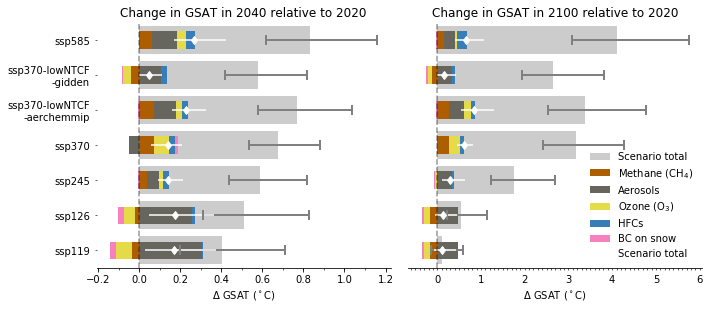

In [332]:
fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop, tabel_dT_sum_slcf,tabel_dT_slcfs,tabel_dT_anthrop_5th,
            tabel_dT_anthrop_95th, tabel_dT_sum_slcf_5, tabel_dT_sum_slcf_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [333]:

scen_no_lowNTCF = [scn for scn in scenarios_fl if 'lowNTCF' not in scn]
print(scen_no_lowNTCF)

['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']


In [334]:
subset_scenarios = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))

In [335]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_slcfs2_5th = tabel_dT_slcfs_5th[subset_scenarios]
tabel_dT_slcfs2_95th = tabel_dT_slcfs_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [336]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245      ssp370  \
                                                                        
2040 Methane (CH$_4$)  -0.0348115  -0.0226653   0.0394332   0.0736096   
     Aerosols            0.305727    0.256158   0.0571758  -0.0493196   
     Ozone (O$_3$)     -0.0767619  -0.0532542   0.0199406   0.0720428   
     HFCs              0.00554347   0.0172801   0.0286784   0.0267792   
     BC on snow         -0.030288  -0.0255414 -0.00607383   0.0149975   
2100 Methane (CH$_4$)    -0.16537   -0.157522 -0.00394258    0.273463   
     Aerosols            0.469746    0.477843    0.326467  -0.0159913   
     Ozone (O$_3$)      -0.142237   -0.140711  -0.0413979    0.238084   
     HFCs              -0.0041241 -0.00179275    0.057409   0.0970282   
     BC on snow         -0.043832  -0.0416578  -0.0397088  0.00784892   

                      ssp370-lowNTCF\n-aerchemmip      ssp585  
                                                               
2040 Methane (CH$_4$)                   0.0736096   0.0596293  
     Aerosols                            0.106629    0.123224  
     Ozone (O$_3$)                      0.0281785   0.0437352  
     HFCs                               0.0267792   0.0425932  
     BC on snow                       -0.00683741 -0.00285113  
2100 Methane (CH$_4$)                    0.273463    0.144593  
     Aerosols                            0.330153    0.264415  
     Ozone (O$_3$)                       0.161022   0.0537004  
     HFCs                               0.0970282    0.223619  
     BC on snow                        -0.0323559  -0.0342643

- Include BC in aerosol total. 
- aaarggh, sorry, a last request, maybe one version with also SSP370lowNTC with and without CH4 decrease (as it was in SOD) and one without and we will see later which one we choose depending on the discussion which will remain in the TS.
- net values. Send. 
- include total in black. 

[[0.20218131 0.20117464 0.15290508 0.14377928 0.18794679 0.21496959]
 [0.30852033 0.31669566 0.22737163 0.20384662 0.26776781 0.32632138]]
                  ssp119    ssp126    ssp245    ssp370  \
                                                         
Scenario total  0.401901  0.511234  0.589496  0.678179   

               ssp370-lowNTCF\n-aerchemmip    ssp585  
                                                      
Scenario total                    0.768473  0.833246  
[[0.26065657 0.32168067 0.52513442 0.73537357 0.84312816 1.01760648]
 [0.46676905 0.58898393 0.93841089 1.11617313 1.40092139 1.64423169]]
                  ssp119    ssp126   ssp245  ssp370  \
                                                      
Scenario total  0.116473  0.545479  1.75446  3.1625   

               ssp370-lowNTCF\n-aerchemmip   ssp585  
                                                     
Scenario total                      3.3804  4.10616  


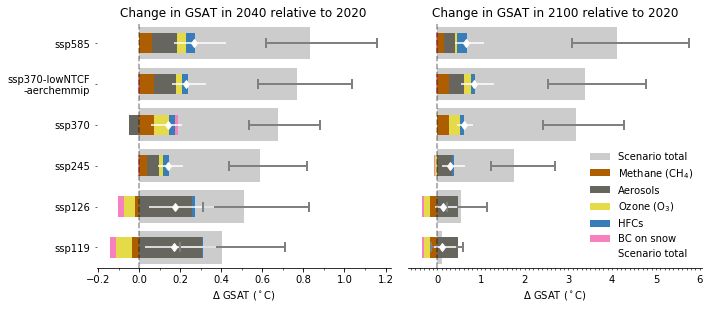

In [337]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.4], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)
fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

plt.show()

In [338]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]


subset_scenarios = list(pd.Series(scen_no_lowNTCF).replace(rn_dic_scen))

In [339]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_slcfs2_5th = tabel_dT_slcfs_5th[subset_scenarios]
tabel_dT_slcfs2_95th = tabel_dT_slcfs_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

In [340]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245      ssp370  \
                                                                        
2040 Methane (CH$_4$)  -0.0348115  -0.0226653   0.0394332   0.0736096   
     Aerosols            0.305727    0.256158   0.0571758  -0.0493196   
     Ozone (O$_3$)     -0.0767619  -0.0532542   0.0199406   0.0720428   
     HFCs              0.00554347   0.0172801   0.0286784   0.0267792   
     BC on snow         -0.030288  -0.0255414 -0.00607383   0.0149975   
2100 Methane (CH$_4$)    -0.16537   -0.157522 -0.00394258    0.273463   
     Aerosols            0.469746    0.477843    0.326467  -0.0159913   
     Ozone (O$_3$)      -0.142237   -0.140711  -0.0413979    0.238084   
     HFCs              -0.0041241 -0.00179275    0.057409   0.0970282   
     BC on snow         -0.043832  -0.0416578  -0.0397088  0.00784892   

                           ssp585  
                                   
2040 Methane (CH$_4$)   0.0596293  
     Aerosols            0.123224  
     Ozone (O$_3$)      0.0437352  
     HFCs               0.0425932  
     BC on snow       -0.00285113  
2100 Methane (CH$_4$)    0.144593  
     Aerosols            0.264415  
     Ozone (O$_3$)      0.0537004  
     HFCs                0.223619  
     BC on snow        -0.0342643

[[0.20218131 0.20117464 0.15290508 0.14377928 0.21496959]
 [0.30852033 0.31669566 0.22737163 0.20384662 0.32632138]]
                  ssp119    ssp126    ssp245    ssp370    ssp585
                                                                
Scenario total  0.401901  0.511234  0.589496  0.678179  0.833246
[[0.26065657 0.32168067 0.52513442 0.73537357 1.01760648]
 [0.46676905 0.58898393 0.93841089 1.11617313 1.64423169]]
                  ssp119    ssp126   ssp245  ssp370   ssp585
                                                            
Scenario total  0.116473  0.545479  1.75446  3.1625  4.10616


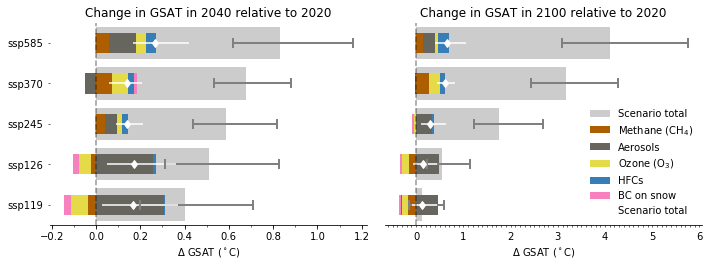

In [341]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.8], sharex=False, sharey=True)
plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [354]:
#tabel_dT_anthrop2 = tabel_dT_anthrop[scen_no_lowNTCF]
#tabel_dT_slcfs2 = tabel_dT_slcfs[scen_no_lowNTCF]

scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]
subset_scenarios = list(pd.Series(scenario_370).replace(rn_dic_scen))

In [355]:
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scenarios]
tabel_dT_slcfs2 = tabel_dT_slcfs[subset_scenarios]
tabel_dT_sum_slcf2 = tabel_dT_sum_slcf[subset_scenarios]
tabel_dT_anthrop2_5th = tabel_dT_anthrop_5th[subset_scenarios]
tabel_dT_anthrop2_95th = tabel_dT_anthrop_95th[subset_scenarios]
tabel_dT_slcfs2_5th = tabel_dT_slcfs_5th[subset_scenarios]
tabel_dT_slcfs2_95th = tabel_dT_slcfs_95th[subset_scenarios]
tabel_dT_sum_slcf2_5 = tabel_dT_sum_slcf_5[subset_scenarios]
tabel_dT_sum_slcf2_95 = tabel_dT_sum_slcf_95[subset_scenarios]

[[0.14377928 0.18794679 0.15942176]
 [0.20384662 0.26776781 0.24186698]]
                  ssp370 ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden
                                                                            
Scenario total  0.678179                    0.768473                0.577828
[[0.73537357 0.84312816 0.71436096]
 [1.11617313 1.40092139 1.16127203]]
                ssp370 ssp370-lowNTCF\n-aerchemmip ssp370-lowNTCF\n-gidden
                                                                          
Scenario total  3.1625                      3.3804                 2.65616


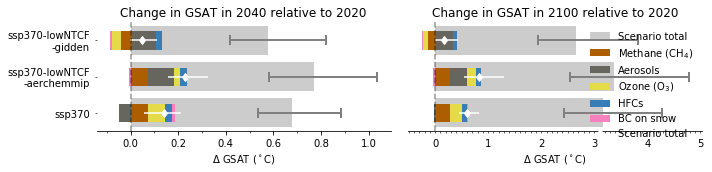

In [356]:
from matplotlib.ticker import (MultipleLocator)
fig, axs = plt.subplots(1, len(years), figsize=[10, 2.5], sharex=False, sharey=True)

plt_stacked(fig, axs, tabel_dT_anthrop2, tabel_dT_sum_slcf2,tabel_dT_slcfs2,tabel_dT_anthrop2_5th,
            tabel_dT_anthrop2_95th, tabel_dT_sum_slcf2_5, tabel_dT_sum_slcf2_95)

fix_axs(axs)

fn = FIGURE_DIR / 'stack_bar_influence_years_horiz_errTot_370only.png'

plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [342]:
variables_erf_comp

['ch4', 'aerosol-total', 'o3', 'HFCs', 'bc_on_snow']

In [343]:
variables_erf_comp_nbc = ['ch4', 'aerosol-total-with_bc', 'o3', 'HFCs']

In [344]:
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[scen_no_lowNTCF]

In [345]:
tabel_dT_slcfs2

ssp119      ssp126      ssp245      ssp370  \
                                                                          
2040 Methane (CH$_4$)    -0.0348115  -0.0226653   0.0394332   0.0736096   
     Aerosols (incl BC)    0.275439    0.230617    0.051102  -0.0343221   
     Ozone (O$_3$)       -0.0767619  -0.0532542   0.0199406   0.0720428   
     HFCs                0.00554347   0.0172801   0.0286784   0.0267792   
2100 Methane (CH$_4$)      -0.16537   -0.157522 -0.00394258    0.273463   
     Aerosols (incl BC)    0.425914    0.436185    0.286758 -0.00814241   
     Ozone (O$_3$)        -0.142237   -0.140711  -0.0413979    0.238084   
     HFCs                -0.0041241 -0.00179275    0.057409   0.0970282   

                            ssp585  
                                    
2040 Methane (CH$_4$)    0.0596293  
     Aerosols (incl BC)   0.120373  
     Ozone (O$_3$)       0.0437352  
     HFCs                0.0425932  
2100 Methane (CH$_4$)     0.144593  
     Aerosols (incl BC)    0.23015  
     Ozone (O$_3$)       0.0537004  
     HFCs                 0.223619

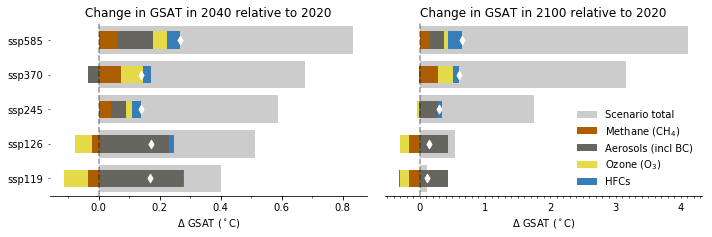

In [346]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 3.4], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[scenario_tot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    # ax.scatter(_t, _t.index, zorder=100, c='w', marker='d')
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')

    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_no_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)
plt.show()

In [347]:
subset_scen_fl = list(pd.Series(scenarios_fl_oneNTCF).replace(rn_dic_scen))
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl_oneNTCF, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl]

ssp119                         0.169409
ssp126                         0.171978
ssp245                         0.139154
ssp370                         0.138109
ssp370-lowNTCF\n-aerchemmip    0.228359
ssp585                         0.266331
dtype: float64
ssp119                         0.114183
ssp126                         0.136160
ssp245                         0.298827
ssp370                         0.600433
ssp370-lowNTCF\n-aerchemmip    0.829311
ssp585                         0.652062
dtype: float64


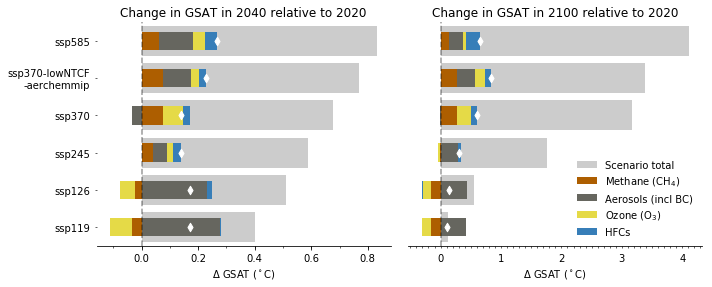

In [348]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.1], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[scenario_tot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_one_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

In [350]:
subset_scen_fl = list(pd.Series(scenarios_fl).replace(rn_dic_scen))
tabel_dT_slcfs2 = table_of_sts(ds_DT, scenarios_fl, variables_erf_comp_nbc, variables_erf_comp_nbc, years,
                               ref_year)
tabel_dT_slcfs2 = tabel_dT_slcfs2.rename(nice_name_var_dic)
tabel_dT_slcfs2 = tabel_dT_slcfs2[subset_scen_fl]
tabel_dT_anthrop2 = tabel_dT_anthrop[subset_scen_fl]

ssp119                         0.169409
ssp126                         0.171978
ssp245                         0.139154
ssp370                         0.138109
ssp370-lowNTCF\n-aerchemmip    0.228359
ssp370-lowNTCF\n-gidden        0.047244
ssp585                         0.266331
dtype: float64
ssp119                         0.114183
ssp126                         0.136160
ssp245                         0.298827
ssp370                         0.600433
ssp370-lowNTCF\n-aerchemmip    0.829311
ssp370-lowNTCF\n-gidden        0.161193
ssp585                         0.652062
dtype: float64


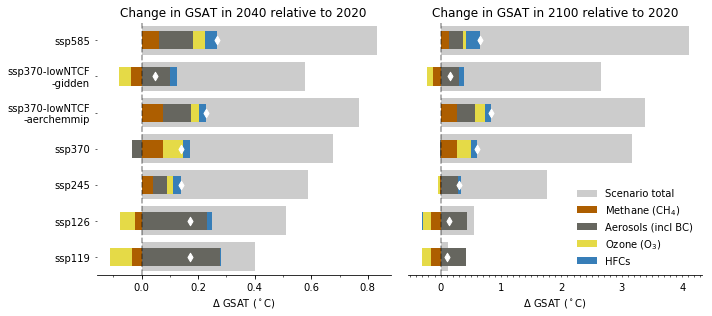

In [351]:
from matplotlib.ticker import (MultipleLocator)

fig, axs = plt.subplots(1, len(years), figsize=[10, 4.5], sharex=False, sharey=True)
tits = ['Near Term surface temperature change (2040 relative to 2020)',
        'Long Term surface T change 2100 relatie to 2020)']
tits = ['Change in GSAT in 2040 relative to 2020', 'Change in GSAT in 2100 relative to 2020']
for yr, ax, tit in zip(years, axs, tits):
    scenario_tot = 'Scenario total'
    # Pick out year and do various renames:
    # Total antropogenic
    tot_yr = tabel_dT_anthrop2.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Sum SLCFs
    sum_yr = tabel_dT_sum_slcf.loc[yr].rename(
        {'Total': scenario_tot, 'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    # Plot bars for anthropopogenic total:
    ax.barh(tot_yr.transpose().index, tot_yr.transpose()[scenario_tot].values, color='k', label='Scenario total',
            alpha=.2,
            )
    # Plot bars for SLCFs total:
    scenario_tot = 'Sum SLCFs'
    s_x = sum_yr.transpose().index
    s_y = sum_yr.transpose()[scenario_tot].values

    # Plot stacked plot of components:
    _tab = tabel_dT_slcfs2.loc[yr].transpose().rename({'ssp370-lowNTCF-aerchemmip': 'ssp370-lowNTCF\n-aerchemmip'})
    _tab = _tab.rename(nice_name_var_dic)
    a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    _t = _tab.sum(axis=1)  # , c=100)#.plot(kind='barh', )
    ax.scatter(_t, list(_t.reset_index().index), zorder=10, c='w', marker='d')
    print(_t)
    # a = _tab.plot(kind='barh', stacked=True, ax=ax, color=ls, legend=(yr != '2040'))  # , grid=True)#stac)
    if not yr == '2040':
        ax.legend(frameon=False, ncol=1)  # [l],labels=['Sce!!nario total'], loc = 4)#'lower right')
    # Zero line:
    ax.axvline(0, linestyle='--', color='k', alpha=0.4)
    ax.set_title(tit)
    ax.set_xlabel('$\Delta$ GSAT ($^\circ$C)')
    ax.xaxis.set_minor_locator(MultipleLocator(.1))
    # ax.grid(axis='y', which='major')

ax = axs[0]

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(right=False, left=False)  # , color='w')

ax = axs[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(labelleft=False, right=False, left=False, color='w')
ax.tick_params(labelright=False, labelleft=False, right=False, left=False, color='w')
ax.yaxis.set_visible(False)
plt.tight_layout()

fn = FIGURE_DIR / 'stack_bar_influence_years_all_lowNTCF_noBC.png'
plt.tight_layout()
ax = plt.gca()

plt.savefig(fn, dpi=300)
plt.savefig(fn.with_suffix('.pdf'), dpi=300)

## Error bars from model uncertainty AND ECS uncertainty

See [Uncertainty_calculation.ipynb](Uncertainty_calculation.ipynb)

## Only ssp370:

In [352]:
scenario_370 = [sc for sc in scenarios_fl if 'ssp370' in sc]